## Practical 6

**Aim:** Train an SVM regressor on the California Housing Dataset

In [2]:
!pip install seaborn numpy pandas matplotlib

  Obtaining dependency information for seaborn from https://files.pythonhosted.org/packages/83/11/00d3c3dfc25ad54e731d91449895a79e4bf2384dc3ac01809010ba88f6d5/seaborn-0.13.2-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.9 kB ? eta -:--:--
   -------- ------------------------------ 61.4/294.9 kB 656.4 kB/s eta 0:00:01
   ---------------------------------------- 294.9/294.9 kB 2.3 MB/s eta 0:00:00



[notice] A new release of pip is available: 23.2.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           17000 non-null  float64
 1   latitude            17000 non-null  float64
 2   housing_median_age  17000 non-null  float64
 3   total_rooms         17000 non-null  float64
 4   total_bedrooms      17000 non-null  float64
 5   population          17000 non-null  float64
 6   households          17000 non-null  float64
 7   median_income       17000 non-null  float64
 8   median_house_value  17000 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           3000 non-null   float64
 1   latitude            3000 non-null   float64
 2   h

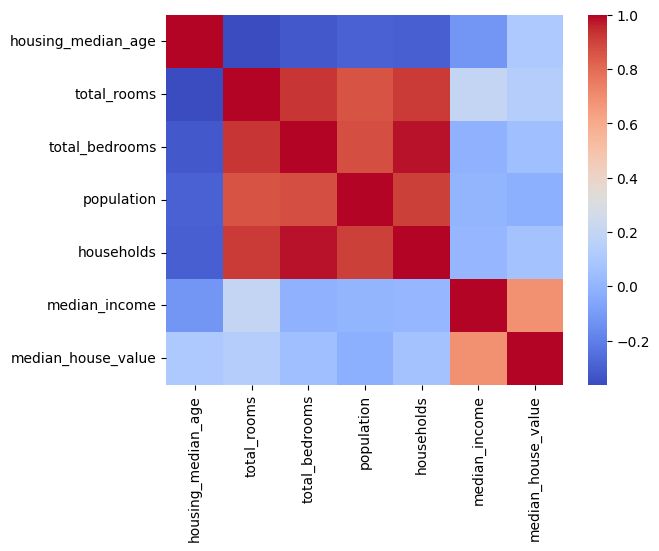

d:\subhashish\msc-cookbook\Sem-2\ML\.venv\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
d:\subhashish\msc-cookbook\Sem-2\ML\.venv\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
d:\subhashish\msc-cookbook\Sem-2\ML\.venv\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
d:\subhashish\msc-cookbook\Sem-2\ML\.venv\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
d:\subhashish\msc-cookbook\Sem-2\ML\.venv\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
d:\subhashish\msc-cookboo

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   total_rooms         20000 non-null  float64
 1   total_bedrooms      20000 non-null  float64
 2   housing_median_age  20000 non-null  float64
 3   median_income       20000 non-null  float64
 4   population          20000 non-null  float64
 5   households          20000 non-null  float64
dtypes: float64(6)
memory usage: 937.6 KB
   Real Values  Predicted Values
0     142700.0     134298.753204
1     500001.0     464915.764933
2      61800.0      89137.638797
3     162800.0     134673.285028
4      90600.0     113502.811525


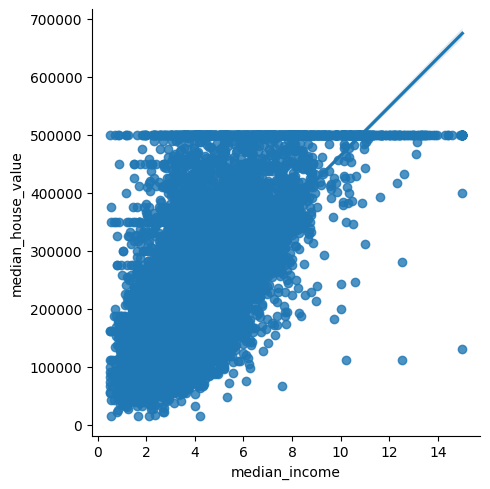

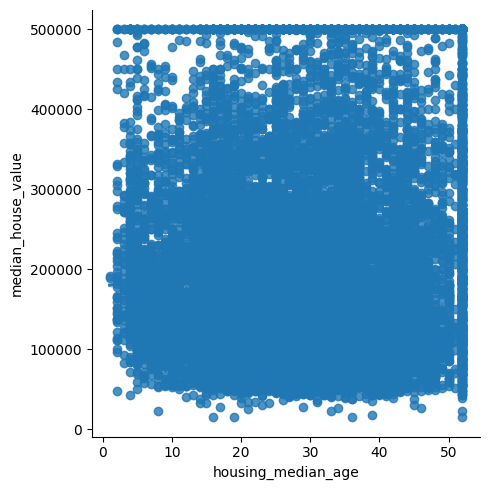

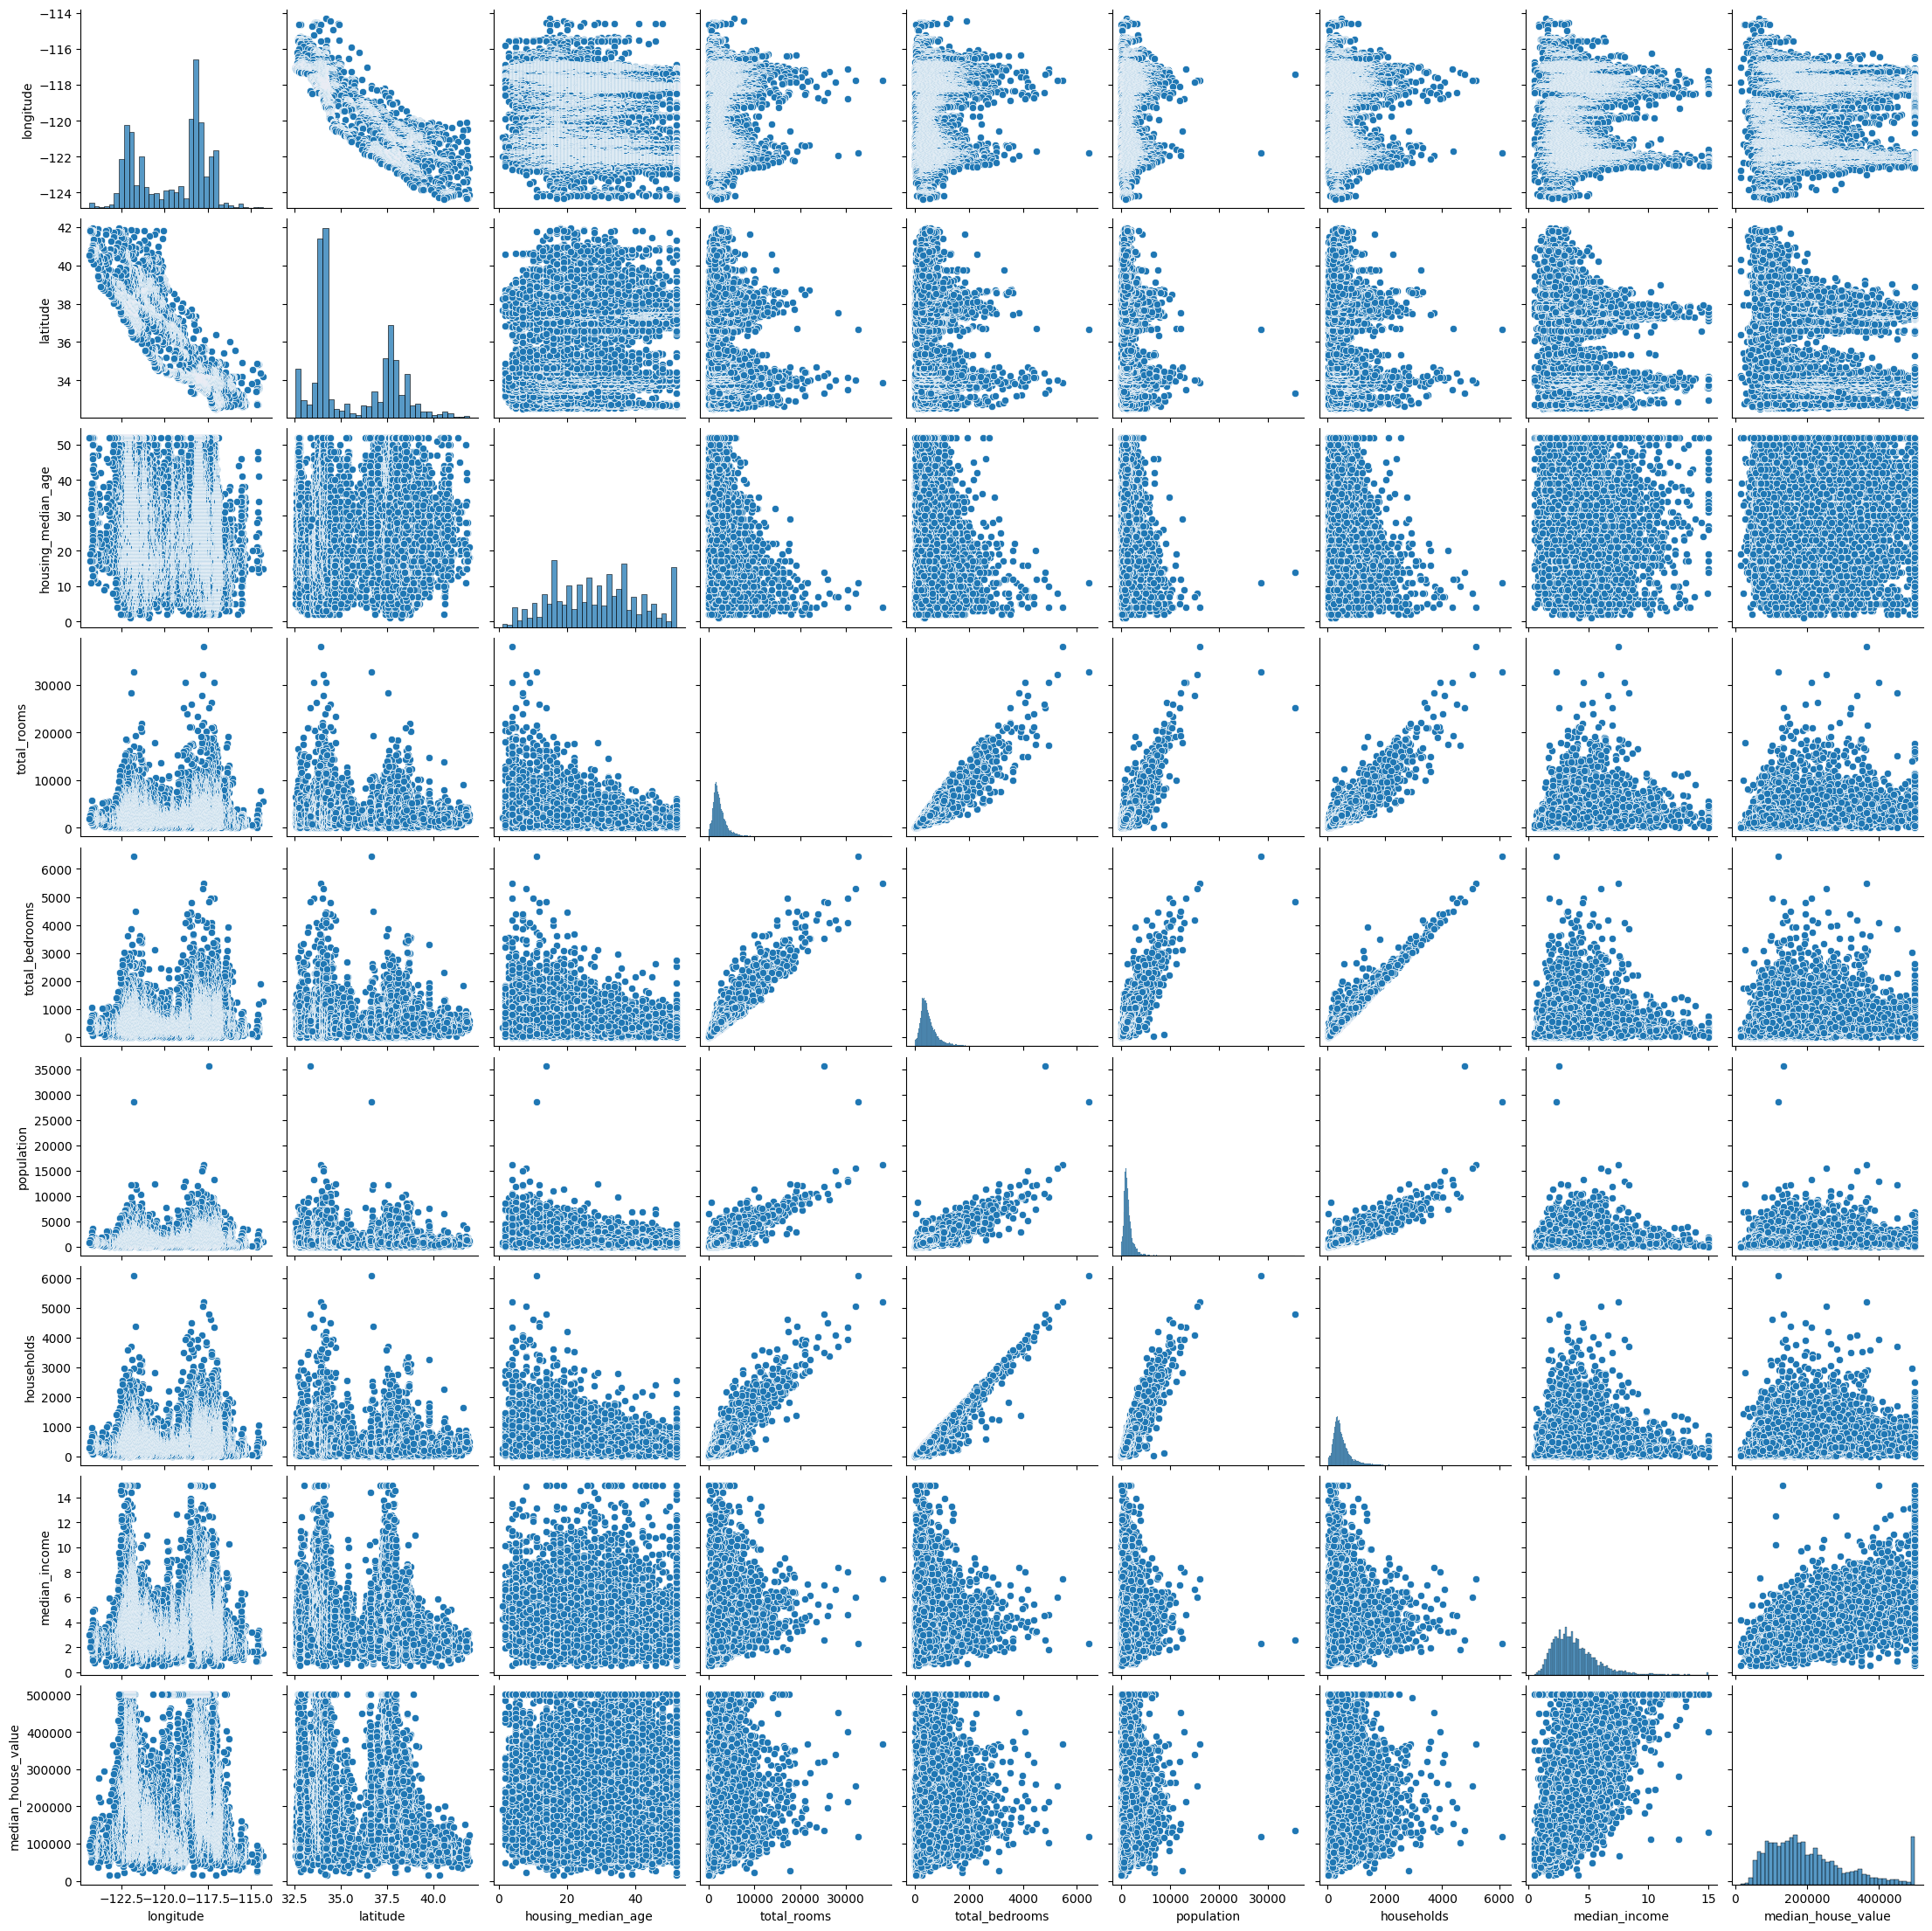

In [4]:
# 1) IMPORT LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 2) LOAD DATA
test  = pd.read_csv("./dataset/california_housing_test.csv")
train = pd.read_csv("./dataset/california_housing_train.csv")

train.head()
train.tail()

print(train.info())
print(test.info())

# 3) SAVE TARGET & COMBINE FOR PREPROCESSING
n_train = train.shape[0]
n_test  = test.shape[0]
y       = train['median_house_value'].values

data = pd.concat((train, test)).reset_index(drop=True)
data.drop(['longitude', 'latitude'], axis=1, inplace=True)

# 4) OPTIONAL: QUICK VISUALIZATIONS
plt.figure()
sns.heatmap(data.corr(), cmap='coolwarm')
plt.show()

sns.lmplot(x='median_income',      y='median_house_value', data=train)
sns.lmplot(x='housing_median_age', y='median_house_value', data=train)
sns.pairplot(train, palette='rainbow')

# 5) FEATURE SELECTION & MISSING-VALUE IMPUTATION
data = data[['total_rooms', 'total_bedrooms',
             'housing_median_age', 'median_income',
             'population', 'households']]
data.info()

for col in data.columns:
    data.fillna(data.mean(), inplace=True)

# split back into train / test
train = data[:n_train]
test  = data[n_train:]

# 6) TRAIN/VALIDATION SPLIT
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    train, y, test_size=0.2, random_state=42
)

# 7) SCALE FEATURES & TARGET
from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test  = sc_X.transform(X_test)    # <-- use transform, not fit_transform

sc_y    = StandardScaler()
# keep y_train/y_test 1D for sklearn, but scale them as column-vectors then ravel
y_train = sc_y.fit_transform(y_train.reshape(-1,1)).ravel()
y_test  = sc_y.transform(   y_test.reshape(-1,1)).ravel()

# 8) FIT THE SVR MODEL
from sklearn.svm import SVR
regressor = SVR(kernel='rbf')
regressor.fit(X_train, y_train)     # no more DataConversionWarning

# 9) PREDICT & INVERSE-SCALE THE OUTPUT
y_pred = regressor.predict(X_test)  
# bring back to original scale
y_pred = sc_y.inverse_transform(y_pred.reshape(-1,1)).flatten()

# 10) COMPARE REAL VS. PREDICTED
df = pd.DataFrame({
    'Real Values'     : sc_y.inverse_transform(y_test.reshape(-1,1)).flatten(),
    'Predicted Values': y_pred
})
print(df.head())